In [225]:
#importing the important libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [226]:
#Loading and displaying the first two rows of the `STRIKE_REPORTS.csv` file, 
#which contains data on wildlife strikes. The `display.max_columns` setting is adjusted to ensure all columns are visible.

wildlife_strikes_df = pd.read_csv(r"C:\Users\USER\Downloads\archive (2)\STRIKE_REPORTS.csv")
pd.set_option('display.max_columns', None)
wildlife_strikes_df.head(2)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,NaN,CA,AWP,NaN,NaN,UAL,UNITED AIRLINES,NaN,1768.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,NaN,CO,ANM,NaN,NaN,UAL,UNITED AIRLINES,NaN,1845.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [227]:
#checking for the duplicate entries
wildlife_strikes_df.duplicated().value_counts()

False    288810
dtype: int64

In [228]:
# The `check_info` function provides a comprehensive overview of each column in the `wildlife_strikes_df` dataset, 
# including data types, unique value counts, and null value counts. The resulting DataFrame is sorted to highlight 
# columns with the most missing values, aiding in data cleaning and analysis.

def check_info(data):
    info_list = []
    for col in data.columns:
        dtype = data[col].dtype
        unique_instances = data[col].nunique()
        null_sum = data[col].isnull().sum()
        
        info_list.append(
        {'column' : col,
        'dtype' : dtype,
        'unique' : unique_instances,
        'total_null' : null_sum})
    info_df = pd.DataFrame(info_list)
    return info_df

In [229]:
draft = check_info(wildlife_strikes_df)
draft.sort_values("total_null", ascending = False)

,column,dtype,unique,total_null
92,NR_FATALITIES,float64,6,288786
91,NR_INJURIES,float64,6,288534
81,BIRD_BAND_NUMBER,float64,208,288420
80,EFFECT_OTHER,object,640,286589
31,ENG_4_POS,float64,4,285520
...,...,...,...,...
63,ING_ENG4,bool,2,0
64,STR_PROP,bool,2,0
65,DAM_PROP,bool,2,0
66,STR_WING_ROT,bool,2,0


In [230]:
# Removing columns from `wildlife_strikes_df` with more than 50% missing values to clean the dataset. 
# A summary of the cleaning process, including the number of columns dropped and remaining, is displayed.

missing_percentage = wildlife_strikes_df.isnull().mean() * 100

threshold = 50  
columns_to_drop = missing_percentage[missing_percentage >= threshold].index

wildlife_strikes_cleaned_df = wildlife_strikes_df.drop(columns=columns_to_drop)

columns_dropped_info = {
    "Columns Dropped": len(columns_to_drop),
    "Columns Remaining": wildlife_strikes_cleaned_df.shape[1],
    "Dropped Columns": columns_to_drop
}

print(columns_dropped_info)

{'Columns Dropped': 20, 'Columns Remaining': 80, 'Dropped Columns': Index(['LOCATION', 'ENROUTE_STATE', 'FLT', 'ENG_3_POS', 'ENG_4_POS', 'SPEED',
       'SKY', 'PRECIPITATION', 'AOS', 'COST_REPAIRS', 'COST_OTHER',
       'COST_REPAIRS_INFL_ADJ', 'COST_OTHER_INFL_ADJ', 'OTHER_SPECIFY',
       'EFFECT', 'EFFECT_OTHER', 'BIRD_BAND_NUMBER', 'NUM_SEEN', 'NR_INJURIES',
       'NR_FATALITIES'],
      dtype='object')}


In [231]:
# Used `SimpleImputer` to fill missing values in `wildlife_strikes_cleaned_df`. 
# Median values for numerical columns and the most common value for categorical columns. 
# Checked for any remaining missing values post-imputation.

from sklearn.impute import SimpleImputer

numerical_cols = wildlife_strikes_cleaned_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = wildlife_strikes_cleaned_df.select_dtypes(include=['object', 'bool']).columns

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

wildlife_strikes_cleaned_df[numerical_cols] = num_imputer.fit_transform(wildlife_strikes_cleaned_df[numerical_cols])
wildlife_strikes_cleaned_df[categorical_cols] = cat_imputer.fit_transform(wildlife_strikes_cleaned_df[categorical_cols])

remaining_nulls = wildlife_strikes_cleaned_df.isnull().sum().sum()
remaining_nulls_info = {
    "Remaining Null Values After Imputation": remaining_nulls
}

remaining_nulls_info

{'Remaining Null Values After Imputation': 0}

In [232]:
# Used `describe()` on `wildlife_strikes_cleaned_df` to get a summary of statistical details 
# for numeric columns, including average values, variability, and range.

wildlife_strikes_cleaned_df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,HEIGHT,DISTANCE
count,2.888100e+05,288810.000000,288810.000000,2.888100e+05,288810.000000,288810.000000,288810.000000,288810.000000,288810.000000,288810.000000,288810.000000,288810.000000,288810.000000
mean,8.736693e+05,7.175974,2011.697798,1.813044e+02,-90.514448,20.506897,6.924348,3.669908,2.009948,2.291295,2.106333,470.416928,0.530834
std,2.526448e+05,2.765082,8.432311,7.658451e+04,306.472863,8.811347,10.569795,0.762404,0.355104,1.963465,1.795714,1384.402905,2.890473
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6.893202e+05,5.000000,2006.000000,3.367566e+01,-97.362440,10.000000,1.000000,4.000000,2.000000,1.000000,1.000000,25.000000,0.000000
50%,7.646935e+05,7.000000,2014.000000,3.880581e+01,-87.904460,22.000000,4.000000,4.000000,2.000000,1.000000,1.000000,50.000000,0.000000
75%,1.064714e+06,9.000000,2019.000000,4.077724e+01,-81.316030,22.000000,7.000000,4.000000,2.000000,5.000000,4.000000,50.000000,0.000000
max,1.472259e+06,12.000000,2023.000000,4.115443e+07,164140.000000,92.000000,2301.000000,5.000000,4.000000,7.000000,7.000000,31300.000000,99.000000


In [233]:
# Converted the "INCIDENT_DATE" column in wildlife_strikes_cleaned_df to datetime format, 
# handling any non-convertible values as missing (NaT) using pd.to_datetime.

wildlife_strikes_cleaned_df["INCIDENT_DATE"] = pd.to_datetime(wildlife_strikes_cleaned_df["INCIDENT_DATE"],
                                                              errors = "coerce")

In [234]:
#checking the INCIDENT_DATE Datatype. 
wildlife_strikes_cleaned_df["INCIDENT_DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 288810 entries, 0 to 288809
Series name: INCIDENT_DATE
Non-Null Count   Dtype         
--------------   -----         
288810 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB


In [235]:
# Extracted year, month, full date, and day of the week from "INCIDENT_DATE" 
# creating new columns "YEAR", "MONTH", "DATE", and "DAY_OF_WEEK" respectively.

wildlife_strikes_cleaned_df["YEAR"] = wildlife_strikes_cleaned_df["INCIDENT_DATE"].dt.year
wildlife_strikes_cleaned_df["MONTH"] = wildlife_strikes_cleaned_df["INCIDENT_DATE"].dt.month
wildlife_strikes_cleaned_df["DATE"] = wildlife_strikes_cleaned_df["INCIDENT_DATE"].dt.date
wildlife_strikes_cleaned_df["DAY_OF_WEEK"] = wildlife_strikes_cleaned_df["INCIDENT_DATE"].dt.day_name()

In [236]:
# Grouped `wildlife_strikes_cleaned_df` by "YEAR" and used `.size()` to count the number of 
# wildlife strike incidents per year, creating a `yearly_trend` Series.

yearly_trend = wildlife_strikes_cleaned_df.groupby("YEAR").size()

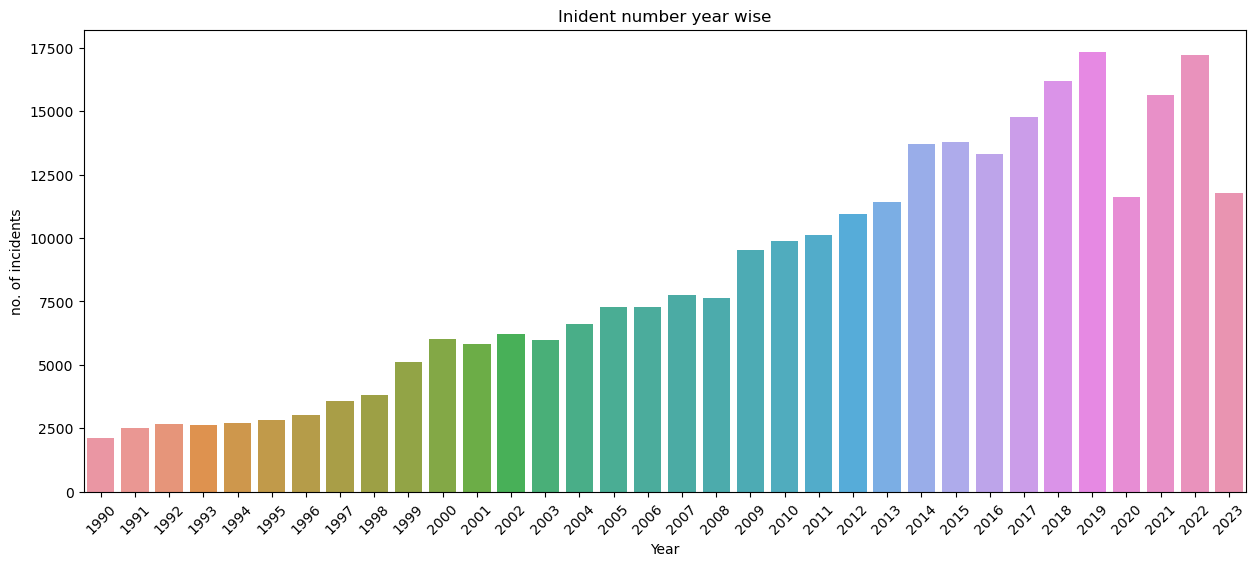

In [237]:
plt.figure(figsize = (15,6))
yt_plot = sns.barplot(x = yearly_trend.index, y = yearly_trend.values)
yt_plot.set_title("Inident number year wise")
yt_plot.set_xlabel("Year")
yt_plot.set_ylabel("no. of incidents")
yt_plot.set_xticklabels(yt_plot.get_xticklabels(), rotation=45)
plt.show()

# There appears to be a general upward trend in the number of incidents over time, with some fluctuations.
# The reasons behind the increase could be due to a number of factors like increased air traffic, better reporting mechanisms,
# changes in wildlife populations, or other environmental factors.
# The peak and subsequent slight decline around 2020 could be related to the global COVID-19 pandemic, 
# which saw a reduction in flights.

In [238]:
# Grouped the data by "MONTH" in `wildlife_strikes_cleaned_df` and counted the number of incidents 
# for each month to analyze the monthly trend of wildlife strikes.

monthly_trend = wildlife_strikes_cleaned_df.groupby("MONTH").size()

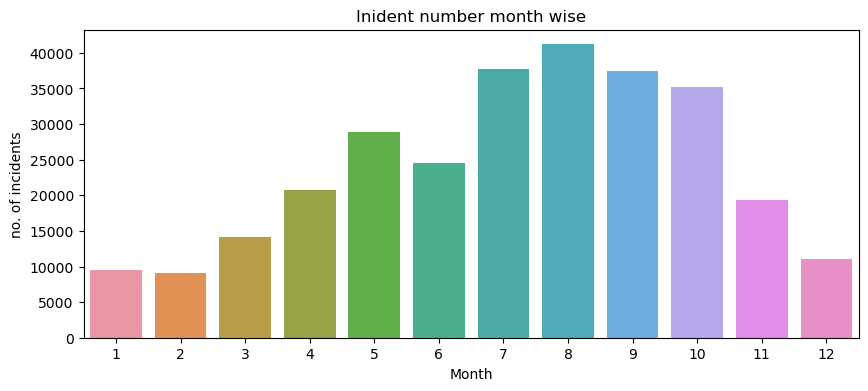

In [239]:
plt.figure(figsize = (10,4))
yt_plot = sns.barplot(x = monthly_trend.index, y = monthly_trend.values)
yt_plot.set_title("Inident number month wise")
yt_plot.set_xlabel("Month")
yt_plot.set_ylabel("no. of incidents")
plt.show()

# Incident numbers peak from July to October, indicating a possible link to bird migration 
# or increased flight activity in these months.
# Incident numbers peak from July to October, indicating a possible link to bird migration or 
# increased flight activity in these months.
# The sharp increase in incidents begins in May, with August having the highest number, pointing to mid-year 
# as the highest risk period for wildlife strikes.

In [240]:
# Calculated the frequency of wildlife strikes for each day of the week using `groupby` on "DAY_OF_WEEK" 
# to identify weekly trends.

weekly_trend = wildlife_strikes_cleaned_df.groupby("DAY_OF_WEEK").size()
weekly_trend

DAY_OF_WEEK
Friday       43179
Monday       42074
Saturday     35149
Sunday       36532
Thursday     44673
Tuesday      43455
Wednesday    43748
dtype: int64

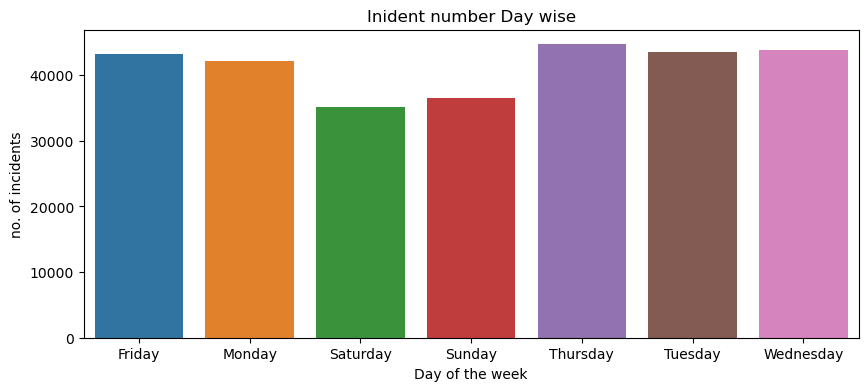

In [241]:
plt.figure(figsize = (10,4))
yt_plot = sns.barplot(x = weekly_trend.index, y = weekly_trend.values)
yt_plot.set_title("Inident number Day wise")
yt_plot.set_xlabel("Day of the week")
yt_plot.set_ylabel("no. of incidents")
plt.show()


# The incident counts are fairly consistent across the week, suggesting no single day is 
# significantly more prone to wildlife strikes.

In [242]:
# Set the "INCIDENT_DATE" column as the index of `wildlife_strikes_cleaned_df` for 
# easier time-series analysis and data manipulation.

wildlife_strikes_cleaned_df.set_index(wildlife_strikes_cleaned_df["INCIDENT_DATE"], inplace = True)

In [243]:
# Grouped wildlife strike data by "AIRPORT" and sorted it in descending order to identify 
# which airports have the highest number of incidents.

airport_specefic = wildlife_strikes_cleaned_df.groupby("AIRPORT").size()
airport_specefic_sorted = airport_specefic.sort_values(ascending = False)

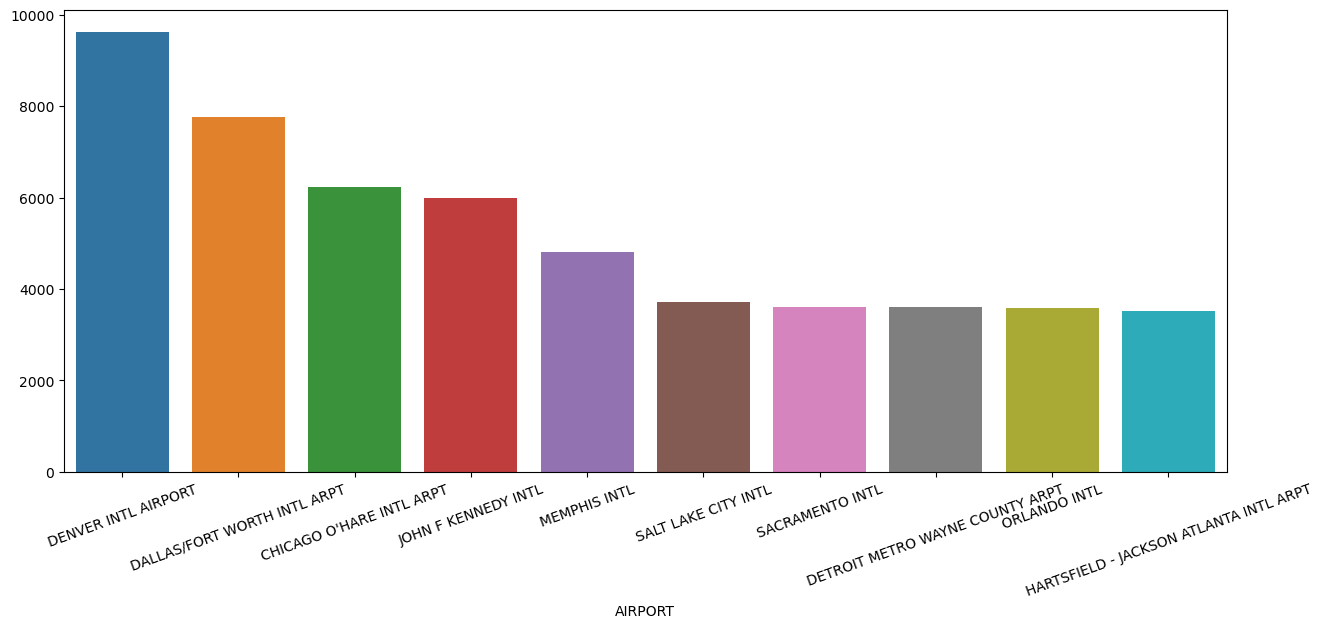

In [244]:
plt.figure(figsize = (15,6) )
ap_plot = sns.barplot(x = airport_specefic_sorted.index[1:11], y = airport_specefic_sorted.values[1:11])
ap_plot.set_xticklabels(ap_plot.get_xticklabels(), rotation=20)
plt.show()

# Displayed a bar plot of the top 10 airports by wildlife strike incidents, 
# omitting the data for 'unknown' which had the highest count. The chart emphasizes that 
# Denver International has the most reported incidents among known airports. 

In [245]:
# Selected a subset of columns relevant for temporal and geographical analysis of wildlife strikes, 
# including the month, year, time, airport location, and coordinates.

relevant_columns = [
    'MONTH', 'YEAR', 'TIME', 'AIRPORT','LATITUDE', 'LONGITUDE','STATE']

In [246]:
#Created `forecast_df`, a new DataFrame containing only the columns specified in `relevant_columns` for focused analysis.

forecast_df = wildlife_strikes_cleaned_df[relevant_columns]

In [247]:
# Sorted `forecast_df` by the index, which is set to "INCIDENT_DATE", 
# to organize the data chronologically for time series analysis.

forecast_df.sort_index(inplace = True)

In [248]:
forecast_df.sample(2)

,MONTH,YEAR,TIME,AIRPORT,LATITUDE,LONGITUDE,STATE
INCIDENT_DATE,,,,,,,
2014-10-13,10,2014,08:00,NEWARK LIBERTY INTL ARPT,40.69250,-74.16866,NJ
2009-07-17,7,2009,08:00,DENVER INTL AIRPORT,39.85841,-104.66700,CO


In [249]:
#importing seasoal_decompose function from statsmodels for decomposing the time series into trend,seasonl & residual.
from statsmodels.tsa.seasonal import seasonal_decompose

In [250]:
#resmapling month wise. 
monthly_incidents = forecast_df.resample('M').size()

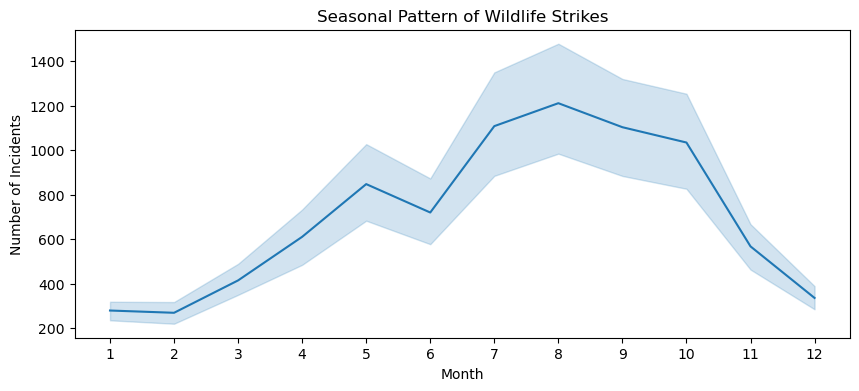

In [251]:
# Seasonality check through a simple line plot
plt.figure(figsize=(10, 4))
sns.lineplot(data=monthly_incidents, x=monthly_incidents.index.month, y=monthly_incidents.values)
plt.title('Seasonal Pattern of Wildlife Strikes')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13))
plt.show()

In [252]:
#decomposing the time series
decomposition = seasonal_decompose(monthly_incidents, model='additive')

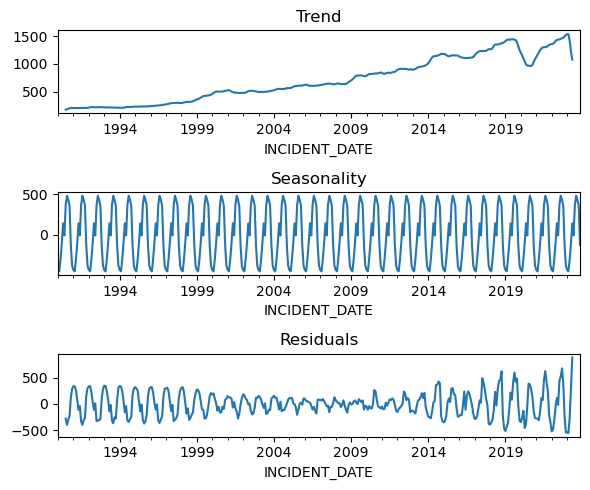

In [253]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 5))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonality')
decomposition.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()

# The first plot shows a generally increasing trend over time, 
# indicating that the number of incidents has been rising.
# The second plot shows a consistent, repeating pattern, which suggests a strong seasonal component in the data, 
# likely correlating with factors like migration patterns or seasonal changes in air traffic.
# The third plot shows the residuals. This plot helps identify any unusual points that the model doesn't explain.

In [254]:
# Imports the adfuller function from the statsmodels.tsa.stattools module, 
# which is used to perform the Augmented Dickey-Fuller test for stationarity on time series data.

from statsmodels.tsa.stattools import adfuller

In [255]:
adf_test = adfuller(monthly_incidents)

In [256]:
adf_output = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used Lag': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4]
}
adf_output
#In adf test the null hypothesis is : The series is not stationary. since p value > 0.05,
#we fail to reject the null hypothesis which cofirms that the series is not stationary.

{'ADF Statistic': -1.58309293836052,
 'p-value': 0.4920806869067583,
 'Used Lag': 14,
 'Number of Observations Used': 392,
 'Critical Values': {'1%': -3.44714244478345,
  '5%': -2.8689414326247995,
  '10%': -2.5707127699396084}}

In [257]:
# Imported the plot_acf and plot_pacf functions from the statsmodels.graphics.tsaplots module, 
# which are used for plotting the autocorrelation function (ACF) and the partial autocorrelation function (PACF) 
# of time series data, respectively. These plots are helpful for identifying the order of autoregressive (AR) 
# and moving average (MA) processes in time series analysis.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

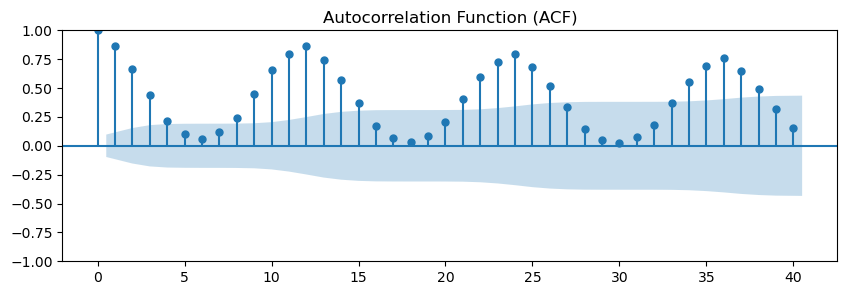

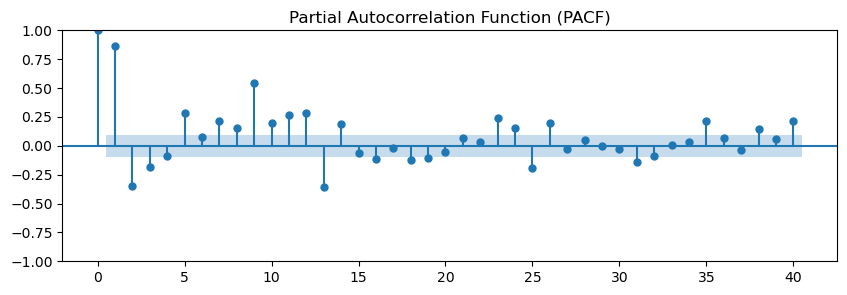

In [258]:
plt.figure(figsize=(10, 3))
plot_acf(monthly_incidents, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()
plt.figure(figsize=(10, 3))
plot_pacf(monthly_incidents, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Strong positive correlation at lag 1, indicating a first-order autoregressive (AR(1)) component in ACF plot
# Significant positive partial autocorrelation at lag 1, supporting a first-order autoregressive (AR(1)) process. in PACF

In [259]:
# Calculatig First-Order Difference for Time Series
# here, we calculate the first-order difference for a time series `monthly_incidents` to make it more stationary.

monthly_incidents_diff = monthly_incidents.diff().dropna()

In [260]:
adf_test_diff = adfuller(monthly_incidents_diff)

In [261]:
# performig the Augmented Dickey-Fuller (ADF) test again for stationarity on the differenced time series 
# monthly_incidents_diff. The P value comes out to be <0.05 confirming the data has obtained stationarity.

adf_output_diff = {
    'ADF Statistic': adf_test_diff[0],
    'p-value': adf_test_diff[1],
    'Used Lag': adf_test_diff[2],
    'Number of Observations Used': adf_test_diff[3],
    'Critical Values': adf_test_diff[4]
}

adf_output_diff

{'ADF Statistic': -4.825041168994909,
 'p-value': 4.869422355763773e-05,
 'Used Lag': 13,
 'Number of Observations Used': 392,
 'Critical Values': {'1%': -3.44714244478345,
  '5%': -2.8689414326247995,
  '10%': -2.5707127699396084}}

In [262]:
# p=1, d=1, q=1 for non-seasonal ARIMA.
# P=1, D=1, Q=1, m=12 for seasonal ARIMA with yearly seasonality.
p, d, q = 1, 1, 1 
P, D, Q, m = 1, 1, 1, 12

In [263]:
# fitting a Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors (SARIMAX) model 
# to the monthly_incidents_diff time series data. 
# It uses the specified orders for both non-seasonal and seasonal components and disables stationarity and 
# invertibility enforcement. The fitted model results are stored in sarima_result.
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model = SARIMAX(monthly_incidents_diff, 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

In [264]:
sarima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  406
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2459.884
Date:                            Sun, 21 Jan 2024   AIC                           4929.767
Time:                                    12:38:14   BIC                           4949.455
Sample:                                02-28-1990   HQIC                          4937.580
                                     - 11-30-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0548      0.033      1.667      0.096      -0.010       0.119
ma.L1         -1.0000      0.030    -33.409      0.000      -1.059      -0.941
ar.S.L12      -0.2447      0.099     -2.471      0.013      -0.439      -0.051
ma.S.L12      -0.5539      0.077     -7.229      0.000      -0.704      -0.404
sigma2      2.487e+04    1.2e-06   2.06e+10      0.000    2.49e+04    2.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             66640.63
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              22.23   Skew:                            -4.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.73e+25. Standard errors may be unstable.
"""

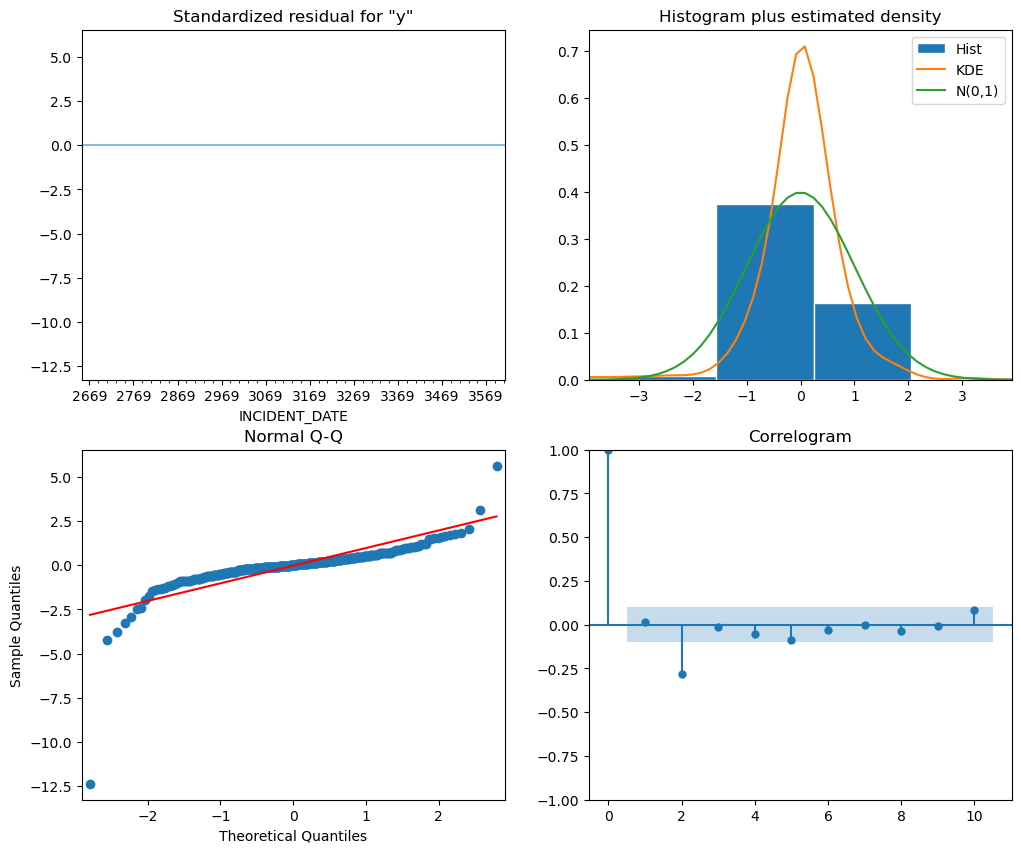

In [265]:
# this shows while the model seems to have addressed autocorrelation well 
# (as there is no significant autocorrelation in the residuals), the residuals do not follow a normal distribution, 
# and there may be outliers or extreme values that the model is not capturing. 
sarima_diagnostics = sarima_result.plot_diagnostics(figsize=(12,10))
plt.show()

In [266]:
#considering all combinations of these parameters within the specified ranges for a SARIMAX model.
p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m = 12

In [267]:
# using the itertools.product function to create a Cartesian product of the parameter ranges for 
# p, d, q (non-seasonal parameters) and P, D, Q (seasonal parameters), along with the seasonal period m
from itertools import product
pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], m) for x in list(product(P, D, Q))]

In [268]:
#perform a grid search for the best SARIMAX model based on the AIC criterion
best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None
best_model = None

In [269]:
# continuing with a loop that iterates through all combinations of pdq and seasonal_pdq, 
# fitting the model for each combination, and then checking if the AIC is lower than the current best_aic
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            temp_model = SARIMAX(monthly_incidents_diff,
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
                best_model = results
        except:
            continue

In [270]:
# The AIC of the best model is approximately 4861.74, 
# which is lower than any other combination of parameters tested in a grid search. 
best_model_summary = {
    "Best AIC": best_aic,
    "Best PDQ": best_pdq,
    "Best Seasonal PDQ": best_seasonal_pdq
}

best_model_summary

{'Best AIC': 4861.743387206943,
 'Best PDQ': (1, 0, 2),
 'Best Seasonal PDQ': (1, 1, 1, 12)}

In [271]:
#taking the first 80% of the data for training and the remaining 20% for testing.
train_size = int(len(monthly_incidents_diff) * 0.8)
train, test = monthly_incidents_diff.iloc[:train_size], monthly_incidents_diff.iloc[train_size:]

In [272]:
# fitting the optimal SARIMAX model identified through a grid search to the training dataset. 
# The model is specified with the best non-seasonal and seasonal parameters and 
# relaxes the constraints on stationarity and invertibility
best_sarima_model = SARIMAX(train, 
                            order=best_pdq, 
                            seasonal_order=best_seasonal_pdq,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
best_sarima_result = best_sarima_model.fit()

In [273]:
# useing the get_forecast method of the fitted SARIMAX model (best_sarima_result) 
# to generate predictions over the test set
predictions = best_sarima_result.get_forecast(steps=len(test))
predicted_means = predictions.predicted_mean

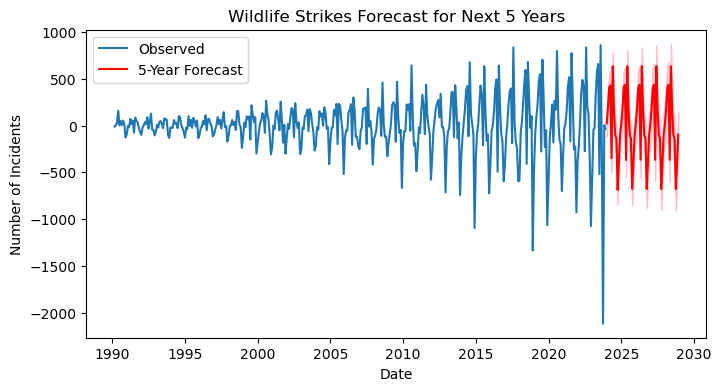

In [274]:
# Forecasting wildlife strikes for the next 5 years (60 months)
forecast_period_5_years = 60
forecast_5_years = best_sarima_result.get_forecast(steps=forecast_period_5_years)
forecast_index_5_years = pd.date_range(monthly_incidents_diff.index[-1], periods=forecast_period_5_years + 1, freq='M')[1:]
forecast_mean_5_years = forecast_5_years.predicted_mean
forecast_conf_int_5_years = forecast_5_years.conf_int()

# Plotting the 5-year forecast
plt.figure(figsize=(8, 4))
plt.plot(monthly_incidents_diff.index, monthly_incidents_diff, label='Observed')
plt.plot(forecast_index_5_years, forecast_mean_5_years, label='5-Year Forecast', color='red')
plt.fill_between(forecast_index_5_years, forecast_conf_int_5_years.iloc[:, 0], forecast_conf_int_5_years.iloc[:, 1], color='pink')
plt.title('Wildlife Strikes Forecast for Next 5 Years')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

# The forecast seems to be capturing the general trend and seasonality patterns that are present in the historical data. 
# If the historical patterns continue into the future without major changes, the forecast may be considered reasonable.
# The confidence intervals are wide, particularly towards the end of the forecast period. 
# This suggests that there is a significant amount of uncertainty in the predictions as time progresses

In [212]:
#importing the crs (Coordinate Reference System) module from the Cartopy library 
import cartopy.crs as ccrs

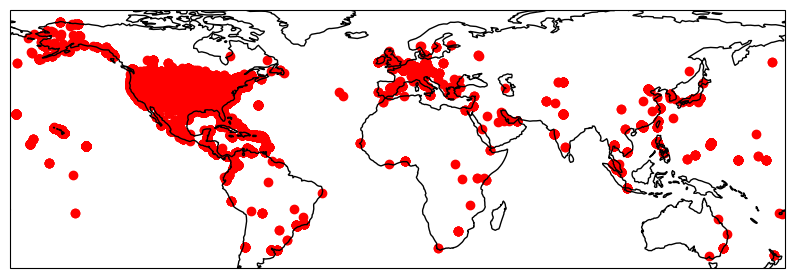

In [213]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Plate Carree is a simple geographic projection
ax.coastlines()  # Adding coastlines

# Check if 'LONGITUDE' and 'LATITUDE' are in the correct range
# and drop rows with invalid coordinates
forecast_df = forecast_df[(forecast_df['LONGITUDE'] >= -180) & (forecast_df['LONGITUDE'] <= 180) & 
                          (forecast_df['LATITUDE'] >= -90) & (forecast_df['LATITUDE'] <= 90)]

# Plotting each incident
ax.scatter(forecast_df['LONGITUDE'], forecast_df['LATITUDE'], marker='o', color='red', transform=ccrs.PlateCarree())

plt.show()

# The map visualizes geospatial data points across the globe, using the PlateCarree projection 
# for accurate latitude and longitude representation. A higher concentration of incidents, marked in red, 
# is observed in North America and Asia, indicating potential regions of interest for further analysis. 